# Run the Qiime2 pipelinne on the babies Dataset, 
## The output was collapsed to level 6 taxonomic information
## The file output is a biom file "feature-table.biom" which is 602 rows x 1216 columns

## 1 . Import the needed libraries and then turn off warning alerts

In [1]:
import pandas as pd
import numpy  as np
import os
import re
import seaborn as sn
import warnings
warnings.filterwarnings(action='ignore')
from biom import load_table
import scipy.stats
import matplotlib.pyplot as plt
import PIL
import io
# from mayavi import mlab

## 2. Load the feature-table file and then turn it into a datafram to be processed using pandas library
###  Also create a testing variable to work on. ( Not needed, was done to be cautious)

In [2]:
table = load_table('composition_table/feature-table.biom')
CompDataFrame = table.to_dataframe()
CompDataFrame.drop(CompDataFrame.index[0],inplace=True)
testDF = CompDataFrame

## Exploring the structure of the table

In [3]:
testDF

,0,1,10,100,1000,1001,1002,1003,1004,1005,...,990,991,992,993,994,995,996,997,998,999
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__[Methanomassiliicoccaceae];g__Methanomassiliicoccus,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__[Methanomassiliicoccaceae];g__vadinCA11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__[Parvarchaeota];c__[Parvarchaea];o__WCHD3-30;f__;g__,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
k__Bacteria;p__Verrucomicrobia;c__[Spartobacteria];o__[Chthoniobacterales];f__[Chthoniobacteraceae];g__Ellin506,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae;g__Deinococcus,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae;g__R18-435,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Trueperaceae;g__Truepera,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 3. Reindex the columns for better handling

In [4]:
testDF = testDF.reindex(sorted(testDF.columns,key = int), axis=1)

In [5]:
testDF

,0,1,2,3,4,5,6,7,8,9,...,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__[Methanomassiliicoccaceae];g__Methanomassiliicoccus,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__[Methanomassiliicoccaceae];g__vadinCA11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__[Parvarchaeota];c__[Parvarchaea];o__WCHD3-30;f__;g__,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
k__Bacteria;p__Verrucomicrobia;c__[Spartobacteria];o__[Chthoniobacterales];f__[Chthoniobacteraceae];g__Ellin506,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae;g__Deinococcus,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae;g__R18-435,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Trueperaceae;g__Truepera,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 4. Retrieving the metaData file I processed previously while implementing the qiime pipeline

In [5]:
# Open the metadata file as a pandas dataFrame
metaDataDf = pd.read_csv('metaData.tsv',sep='\t')
metaDataDf.head()

,sample-id,Run,Alias,barcode (exp),host_subject_ID,Day_of_life,delivery,sex
0,0,ERR1464419,qiita_sid_10249:10249.C001.02SS,TGTGCGATAACA,1,36,Vaginal,female
1,1,ERR1464420,qiita_sid_10249:10249.C001.03SS,GTCGAATTTGCG,1,42,Vaginal,female
2,2,ERR1464421,qiita_sid_10249:10249.C001.05SS,GCATCAGAGTTA,1,57,Vaginal,female
3,3,ERR1464422,qiita_sid_10249:10249.C001.06SS,GTGGTCATCGTA,1,61,Vaginal,female
4,4,ERR1464423,qiita_sid_10249:10249.C001.07SS,CTGAAGGGCGAA,1,92,Vaginal,female


## 5. To be able to Analyze each group, I had to rename the columns by ( host_ID,                      Day_of_life), This will also help in ordering the columns of each group ( 1 host).                Ordering will enable the calculation of corrolation coefficient later

####    get_host_id function enables getting the day of life and host ID from samle ID, using the metaData file

In [6]:
def get_host_id(x):
    z =     metaDataDf[metaDataDf['sample-id'] == int(x)]['host_subject_ID'][int(x)]
    y =     metaDataDf[metaDataDf['sample-id'] == int(x)]['Day_of_life'][int(x)]
    
    z = str(z)
    y = str(y)
    Y = z+','+y
    return (Y)


In [7]:
testDF.rename(columns=lambda x: get_host_id(x), inplace=True)
testDF

,"1,36","1,42","1,57","1,61","1,92","1,122","1,153","1,183","1,214","1,244",...,"38,123","41,64","41,126","42,61","42,122","43,35","43,96","44,33","44,41","44,92"
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__[Methanomassiliicoccaceae];g__Methanomassiliicoccus,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__[Methanomassiliicoccaceae];g__vadinCA11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__[Parvarchaeota];c__[Parvarchaea];o__WCHD3-30;f__;g__,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
k__Bacteria;p__Verrucomicrobia;c__[Spartobacteria];o__[Chthoniobacterales];f__[Chthoniobacteraceae];g__Ellin506,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae;g__Deinococcus,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae;g__R18-435,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Trueperaceae;g__Truepera,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 6. One more step in cleaning the data which is dropping the columns with NaN values, This step would not affect the analysis much, but is needed to be able to do the following calculations.

In [8]:
# DROP NANs
for i in list(testDF.columns):
    if 'na' in i:
#         print(i)
        try:
            testDF.drop(i,axis=1,inplace=True)
        except:
            pass

## 7. Sorting the columns in two step process, First is to sort by host_ID, then sort by day of life. 

In [9]:
def keySort(a):
    temp = []
#     print(a)
    for i in a:
        h = i.split(',')
#         print(h)
        temp.append(h[0])
#     print(temp)
    temp = sorted(list(np.unique(temp)),key = int)
    temp3= []
    for j in temp:
        temp2 = []
        for k in a:
            
            h = k.split(',')
            if j == h[0]:
                temp2.append(h[1])
        temp2 = sorted(temp2, key = int)
        for i in temp2:
            temp3.append(j+','+i)
    return temp3
        
testDF = testDF.reindex(keySort(list(testDF.columns)), axis=1)
testDF.head()

,"1,-21","1,-21","1,0","1,5","1,18","1,18","1,36","1,42","1,42","1,49",...,"57,62","57,91","57,91","57,125","57,125","57,157","57,215","57,238","57,244","57,277"
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,1.0,1.0,1.0,72.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__[Methanomassiliicoccaceae];g__Methanomassiliicoccus,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__[Methanomassiliicoccaceae];g__vadinCA11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
k__Archaea;p__[Parvarchaeota];c__[Parvarchaea];o__WCHD3-30;f__;g__,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 8. Rename the columns again to perform groupBy calculation on the dataFrame

In [11]:
# DONT RUN UNLESS YOU SPECIFICALY WANT TO
# testDF.to_csv('OTUs.txt',sep='\t',index=False)

In [10]:
# Rename again to groupBy
testDF.rename(columns=lambda x: re.search(r'.+,',x).group(0)[:-1], inplace=True)

In [45]:
testDF.index[0]

'k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter'

In [11]:
list(testDF.sum(axis=0))


[11592.0,
 11592.0,
 14992.0,
 38919.0,
 17728.0,
 17728.0,
 10893.0,
 18256.0,
 18256.0,
 15031.0,
 35474.0,
 21104.0,
 22338.0,
 14453.0,
 16742.0,
 21467.0,
 16834.0,
 9567.0,
 14428.0,
 14373.0,
 17742.0,
 25845.0,
 25727.0,
 13286.0,
 17966.0,
 10349.0,
 14180.0,
 27595.0,
 20648.0,
 6675.0,
 21077.0,
 15855.0,
 16400.0,
 13344.0,
 38656.0,
 11906.0,
 28468.0,
 21594.0,
 21087.0,
 21087.0,
 25448.0,
 25135.0,
 25135.0,
 25055.0,
 25055.0,
 20980.0,
 27818.0,
 27690.0,
 23718.0,
 24659.0,
 11740.0,
 11740.0,
 16949.0,
 16949.0,
 8563.0,
 18838.0,
 32204.0,
 32204.0,
 22724.0,
 21187.0,
 18896.0,
 13460.0,
 8038.0,
 13819.0,
 31763.0,
 24695.0,
 22517.0,
 12147.0,
 14697.0,
 18711.0,
 52365.0,
 24492.0,
 20478.0,
 25726.0,
 25726.0,
 17537.0,
 70849.0,
 70849.0,
 26520.0,
 26486.0,
 27497.0,
 12724.0,
 12724.0,
 5010.0,
 15005.0,
 15005.0,
 15005.0,
 23532.0,
 23532.0,
 20078.0,
 7643.0,
 12915.0,
 18844.0,
 19451.0,
 16850.0,
 18422.0,
 27448.0,
 26976.0,
 17771.0,
 7377.0,
 15165.

## 9. Groupby column names, to perform analysis on groups seperately

In [12]:
testDFg = testDF.groupby(testDF.columns, axis=1)

## 10. Start corrolation calculation ! This step took over 20 hours. I saved the result in a file called "list_of_corrolations.py"

In [16]:

# Don't Run this! It will take so much time. Use the file instead.
# for v1 in range(0,len(testDF.index)-1):
#     for v2 in range(v1+1,len(testDF.index)):
#         print(v1,end=" {}..".format(v2))
#         print()
#         for i in dict(testDFg.groups):
#             i = int(i)
#         #     print(i)
#             x = list(testDFg.get_group(str(i)).iloc[v1])
#             y = list(testDFg.get_group(str(i)).iloc[v2])
#         #     print(x)
#             coef,pval = scipy.stats.pearsonr(x, y)
#             if coef  > 0:
#                 list_of_corrolations.append((coef,v1,v2,i))
#             else:
#                 continue
                
#         #     print(np.corrcoef(x,y))

In [13]:
import list_of_corrolations
from list_of_corrolations import myList

In [14]:
list_of_corrolations = myList

## 11. Create a temp variable, (not needed too).

In [15]:
tempListOfCorrolations = []
for i in list_of_corrolations:
    tempListOfCorrolations.append(i)

# Make a corrolation matrix with Pandas then Visualize it :'D

## A. Separate the groups 

In [16]:
groupsCorrs = {}
for i in range(1,58):
    groupsCorrs[i] = []
    
for i in tempListOfCorrolations:
    groupsCorrs[i[3]].append((i[0],i[1],i[2]))

## B. Make one giant 3d Array

In [17]:
threeDList = []
for j in groupsCorrs:
    
    groupDf = pd.DataFrame(index=list(range(0,602)), columns=list(range(0,602)))
    groupDf = groupDf.fillna(0)
    groupDf = groupDf.astype(np.float64)
#     if j %2 == 0:
#         continue
#     print(j)
    for i in groupsCorrs[j]:
    #     print(i[2])
        
        groupDf.iloc[i[1]][i[2]] = i[0]
    threeDList.append(groupDf.values)
threeDList = np.array(threeDList)

## C. Optional, Average all 57 groups to be able to visualize one 2D array,
## __yellowish areas are the candidates for our research, because they are the spots that is shared between multiple groups

In [18]:
# %matplotlib qt
%matplotlib inline

5

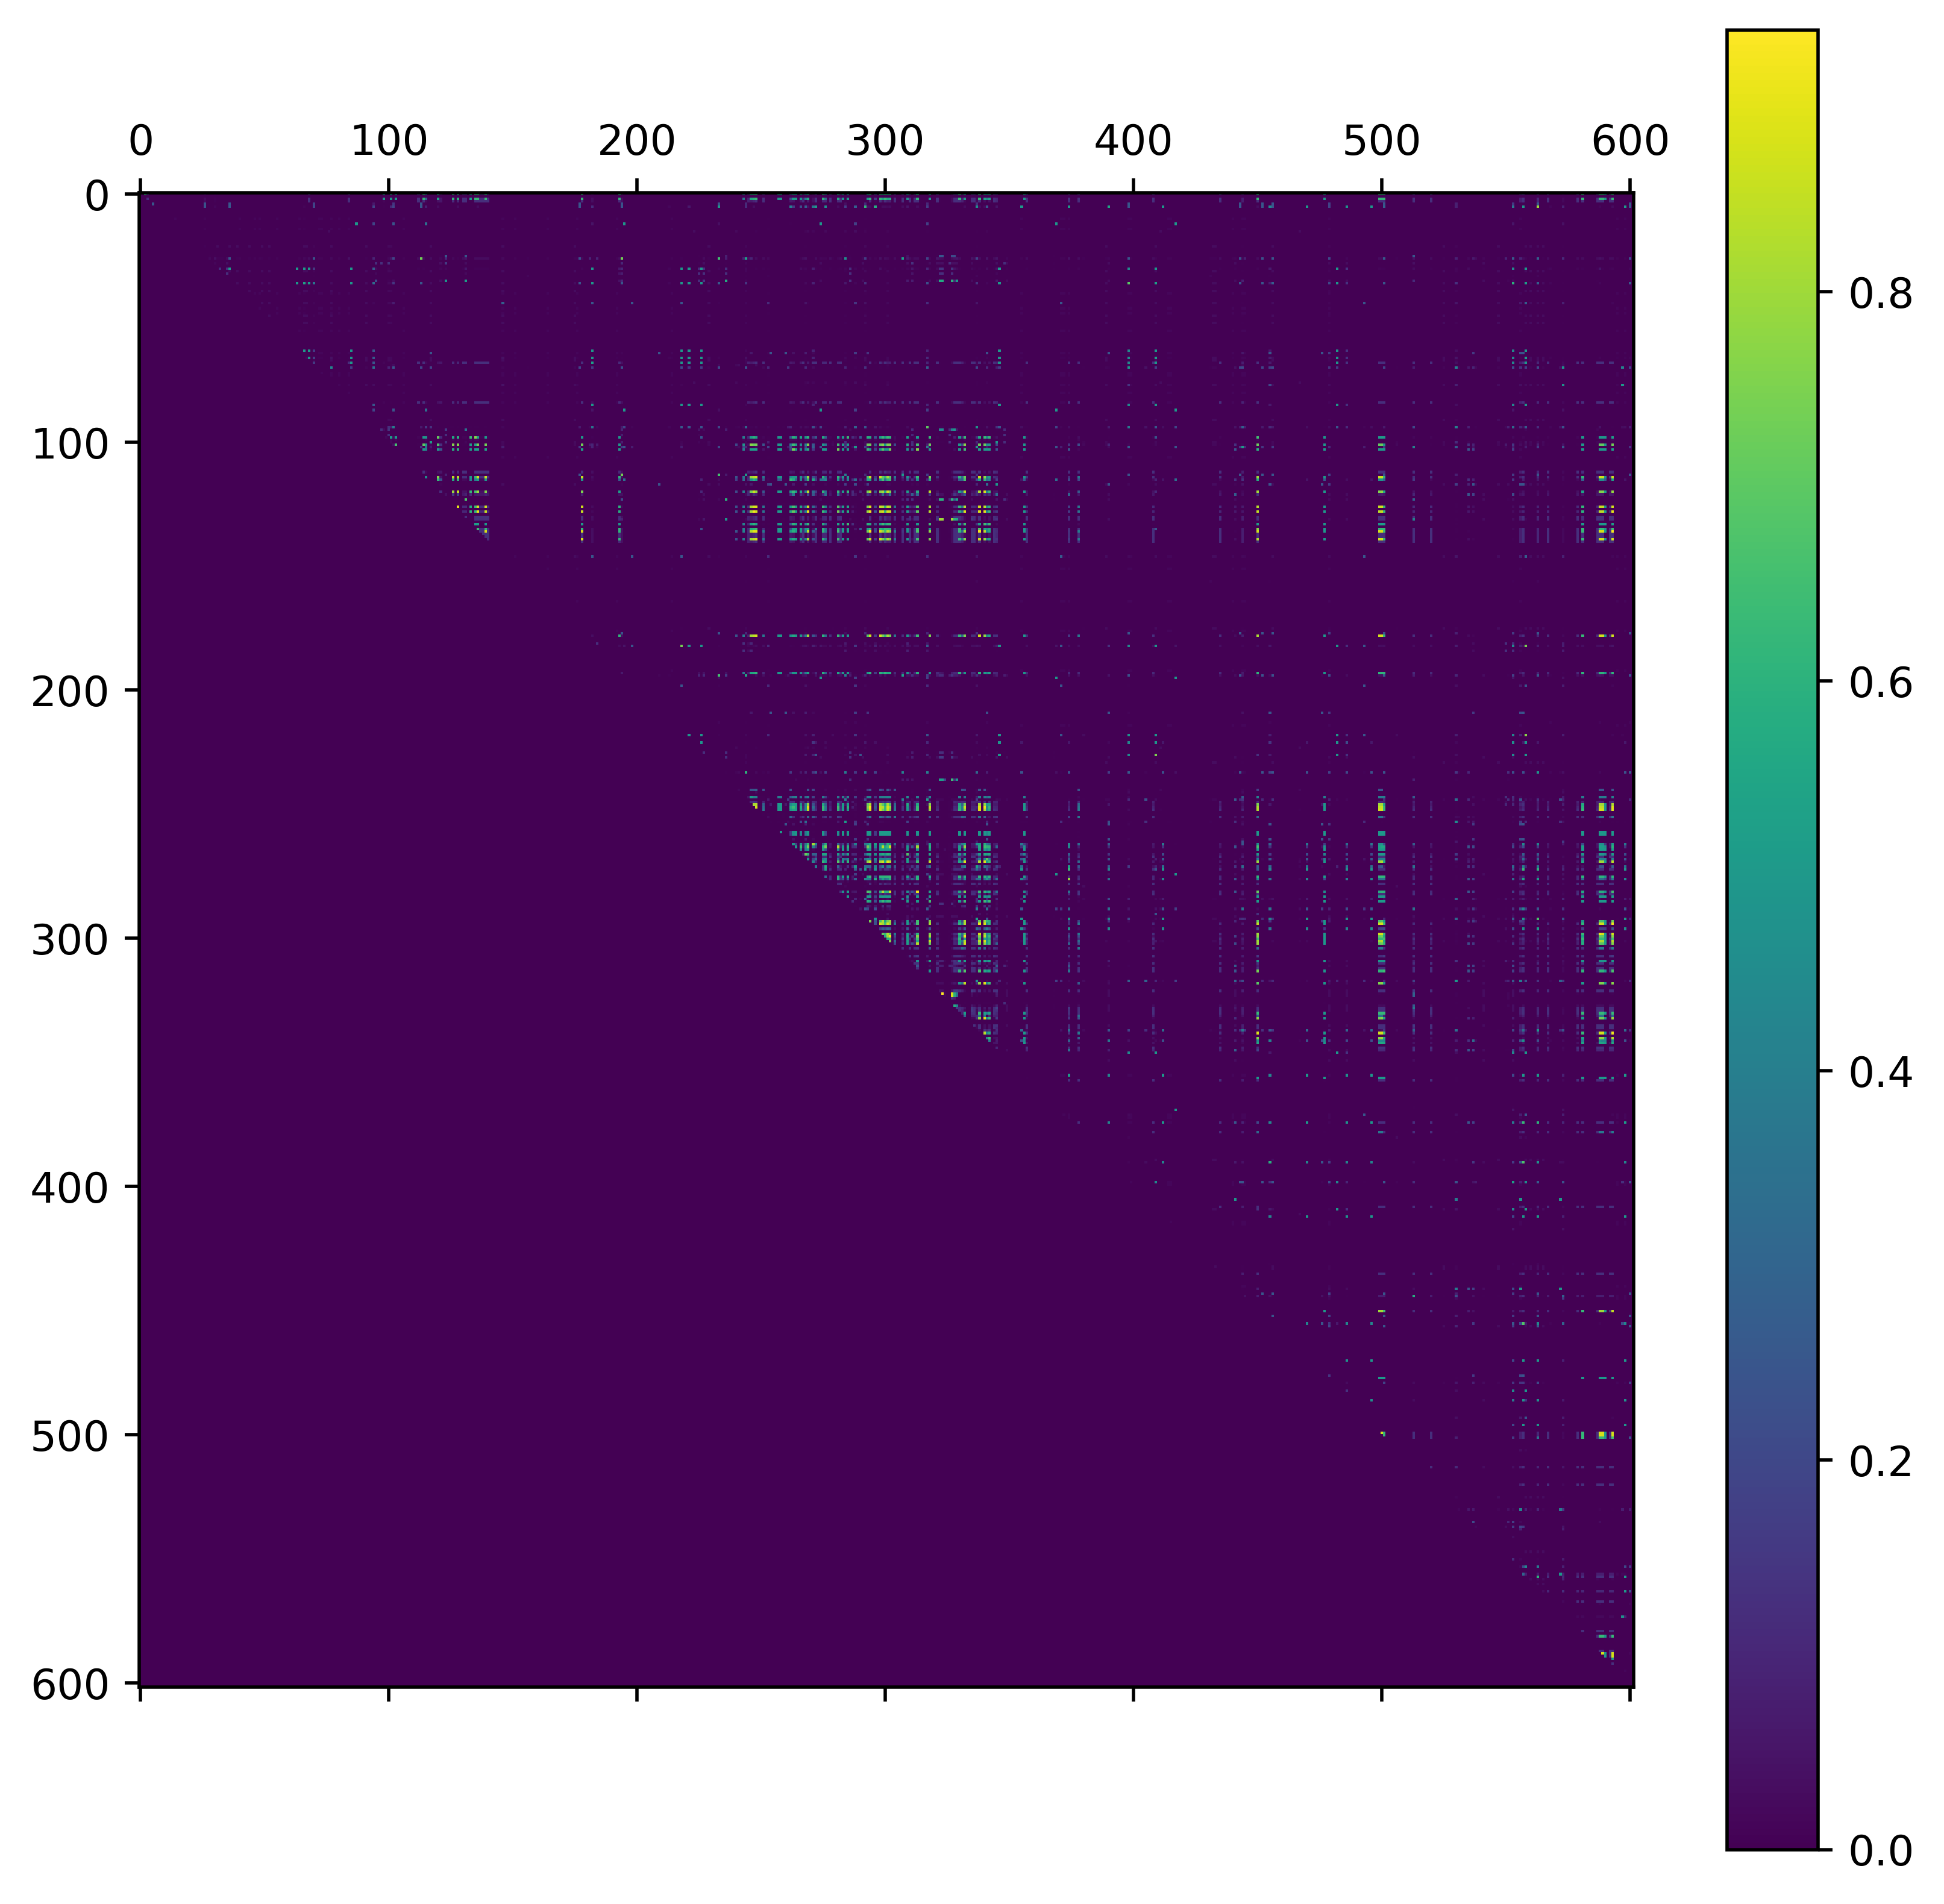

In [19]:
def onclick(event):
    print(event.xdata, event.ydata)

dataAvg = np.zeros((602,602))
for i in groupsCorrs:
    dataAvg = (dataAvg + threeDList[i-1]) / 2.0

fig = plt.figure(figsize=(8, 8), dpi=500,)
ax  = fig.add_subplot(111)
cax = ax.matshow(dataAvg)
fig.colorbar(cax)

fig.canvas.mpl_connect('button_press_event', onclick)
# fig.canvas.mpl_connect('button_press_event', onclick)
# plt.show()
# plt.gcf().canvas.mpl_connect('button_press_event',mouse_move)
# plt.show()

In [24]:
# fig = plt.figure(figsize=(8, 8), dpi=500,)
# ax  = fig.add_subplot(111)
# cax = ax.matshow(threeDList[10])
# fig.colorbar(cax)

# fig.canvas.mpl_connect('button_press_event', onclick)

In [20]:
All_points = []
for j in range(dataAvg.shape[1]):
    for i in range(dataAvg.shape[0]):
        All_points.append((dataAvg[i][j],i,j))

In [21]:
sorted_corrolations = sorted(All_points,reverse=True)

## Some Bacteria that might have some corrolations ! I might have found some verfications from literature maybe ?

In [22]:
for c,i in enumerate(sorted_corrolations):
    if c ==20:
        break
    print('This is a potential Pair -> \n 1 - {} -{}, \n 2- {} - {}'.format(i[1],testDF.index[i[1]],i[2],testDF.index[i[2]]))
    
    print()

This is a potential Pair -> 
 1 - 322 -k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__[Tissierellaceae];g__Anaerococcus, 
 2- 323 - k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__[Tissierellaceae];g__Finegoldia

This is a potential Pair -> 
 1 - 136 -k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__[Odoribacteraceae];g__Odoribacter, 
 2- 593 - k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Akkermansia

This is a potential Pair -> 
 1 - 247 -k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__, 
 2- 294 - k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__

This is a potential Pair -> 
 1 - 136 -k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__[Odoribacteraceae];g__Odoribacter, 
 2- 338 - k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Coprobacillus

This is a potential Pair -> 
 1 - 136 -k__Bacte

# Visualizing the percentage of OTU pairs that fall into a specific correlation Value Region

In [36]:
sorted_corrolations
div = [[],[],[],[],[]]
for i in sorted_corrolations:
    if i[0] > 0.9:
        div[0].append(i)
        continue
    elif i[0] > 0.8:
        div[1].append(i)
        continue
    elif i[0] > 0.6:
        div[2].append(i)
        continue
    elif i[0] > 0.4:
        div[3].append(i)
        continue
    else:
        div[4].append(i)
        continue


<Figure size 1200x1200 with 0 Axes>

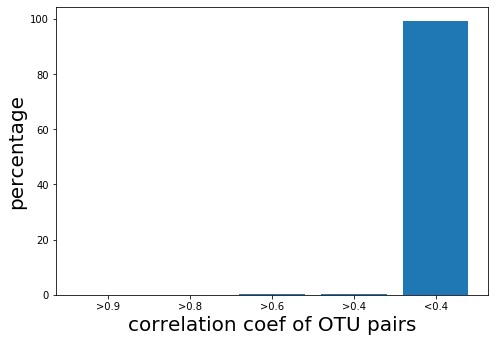

In [60]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

fig = figure()
ax = fig.add_axes([0,0,1,1])

percs = ['>0.9', '>0.8', '>0.6', '>0.4', '<0.4']
plt.xlabel('correlation coef of OTU pairs', fontsize=20)
plt.ylabel('percentage', fontsize=20)
ax.bar(percs,list(map(lambda a : 100*a /len(sorted_corrolations),list(map(len,div)))))
plt.show()

In [48]:
list(map(len,div))

[15, 231, 500, 1254, 360404]

# WHY no negative corrolations??, Will explore that :D

In [24]:
for i in tempListOfCorrolations:
    if i[0] < 0:
        print(i)

# TODO: Is it a real result? check the group numbers!

In [61]:
sorted_corrolations = sorted(All_points)

In [30]:
sorted_corrolations

[(0.0, 0, 0),
 (0.0, 0, 4),
 (0.0, 0, 6),
 (0.0, 0, 7),
 (0.0, 0, 8),
 (0.0, 0, 9),
 (0.0, 0, 10),
 (0.0, 0, 11),
 (0.0, 0, 12),
 (0.0, 0, 13),
 (0.0, 0, 14),
 (0.0, 0, 15),
 (0.0, 0, 16),
 (0.0, 0, 17),
 (0.0, 0, 18),
 (0.0, 0, 19),
 (0.0, 0, 20),
 (0.0, 0, 21),
 (0.0, 0, 22),
 (0.0, 0, 23),
 (0.0, 0, 24),
 (0.0, 0, 25),
 (0.0, 0, 27),
 (0.0, 0, 29),
 (0.0, 0, 31),
 (0.0, 0, 32),
 (0.0, 0, 33),
 (0.0, 0, 37),
 (0.0, 0, 38),
 (0.0, 0, 39),
 (0.0, 0, 40),
 (0.0, 0, 41),
 (0.0, 0, 42),
 (0.0, 0, 43),
 (0.0, 0, 44),
 (0.0, 0, 45),
 (0.0, 0, 46),
 (0.0, 0, 47),
 (0.0, 0, 48),
 (0.0, 0, 49),
 (0.0, 0, 50),
 (0.0, 0, 51),
 (0.0, 0, 52),
 (0.0, 0, 53),
 (0.0, 0, 54),
 (0.0, 0, 55),
 (0.0, 0, 56),
 (0.0, 0, 57),
 (0.0, 0, 58),
 (0.0, 0, 59),
 (0.0, 0, 60),
 (0.0, 0, 61),
 (0.0, 0, 62),
 (0.0, 0, 63),
 (0.0, 0, 64),
 (0.0, 0, 65),
 (0.0, 0, 66),
 (0.0, 0, 67),
 (0.0, 0, 69),
 (0.0, 0, 71),
 (0.0, 0, 72),
 (0.0, 0, 73),
 (0.0, 0, 74),
 (0.0, 0, 75),
 (0.0, 0, 76),
 (0.0, 0, 77),
 (0.0, 0, 78),
 

In [31]:
scipy.stats.pearsonr([1,2,3], [1,1,5])

(0.8660254037844386, 0.3333333333333335)

# After a bit of research, we can not extablish a strong corrolation association in compositional Data. 

## SparCC can form an alternative to calculate corrolations between OTUs because it take the compositional model into considiration
## Best alternative is to study Corrolation in Quantitative Datasets https://www.frontiersin.org/articles/10.3389/fgene.2019.00516/full#B54

## Which uses sequencing-based techniques with orthogonal measurements of microbial cell counts from the same sample

In [63]:
sparcc = pd.read_csv('cor_output.out',sep='\t',header=None)
sparcc.drop(0,axis=1,inplace=True)
sparcc.drop(0,axis=0,inplace=True)
sparcc

,1,2,3,4,5,6,7,8,9,10,...,593,594,595,596,597,598,599,600,601,602
1,1.000000,-0.008206,0.013269,0.020643,-0.011800,-0.026227,-0.008403,-0.010769,-0.020821,0.001922,...,-0.011008,0.051382,-0.019462,-0.023397,-0.006302,-0.016805,-0.013431,-0.002169,-0.011281,-0.008023
2,-0.008206,1.000000,0.001830,0.004171,0.022869,-0.021705,0.013575,0.004196,0.008488,0.015561,...,0.011286,-0.054535,0.011613,0.012566,0.023086,0.019847,-0.001302,0.009073,0.009678,0.014173
3,0.013269,0.001830,1.000000,0.008850,0.007670,-0.035042,0.028677,0.005684,0.006213,0.019246,...,0.005591,-0.033098,0.011995,0.008984,0.001265,0.012392,0.016069,0.004021,0.016236,0.022655
4,0.020643,0.004171,0.008850,1.000000,0.013651,-0.017403,0.010404,0.014840,0.006510,0.011514,...,0.000987,-0.035030,0.024295,0.001775,0.021426,0.017461,-0.009538,-0.000886,0.009922,0.027725
5,-0.011800,0.022869,0.007670,0.013651,1.000000,-0.015404,0.016897,0.011526,0.018961,0.012979,...,0.012925,-0.062739,0.003703,0.007410,0.019724,-0.004667,0.004454,0.018930,0.022274,0.024147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-0.016805,0.019847,0.012392,0.017461,-0.004667,-0.029484,0.004476,0.020495,0.030422,0.041757,...,0.014634,-0.042042,0.007202,0.002945,0.005156,1.000000,0.021400,0.021727,0.017865,0.011556
599,-0.013431,-0.001302,0.016069,-0.009538,0.004454,0.054848,0.026674,0.008799,0.028866,0.004750,...,0.006464,-0.018387,0.017695,0.015695,0.005173,0.021400,1.000000,-0.000993,0.023103,-0.005674
600,-0.002169,0.009073,0.004021,-0.000886,0.018930,-0.010404,0.007420,0.006790,0.005240,0.028482,...,0.015829,-0.069567,0.019773,0.019613,0.008631,0.021727,-0.000993,1.000000,0.004094,0.016209
601,-0.011281,0.009678,0.016236,0.009922,0.022274,-0.014343,0.006235,0.020783,0.020345,0.010043,...,0.010059,-0.060862,-0.001085,0.015657,0.028763,0.017865,0.023103,0.004094,1.000000,0.016275


In [64]:
All_points = []
for j in range(1,sparcc.shape[1]+1):
    for i in range(sparcc.shape[0]):
        All_points.append((sparcc.iloc[i][j],i,j))
#         print(1)
sorted_cors_sparcc = sorted(All_points,reverse=True)


In [65]:
# Getting rid of the ones
sorted_cors_sparcc_noOnes = sorted_cors_sparcc[602:]
reverse_cors_sparcc = sorted(All_points)

In [66]:
for c,i in enumerate(sorted_cors_sparcc_noOnes):
    if c ==20:
        break
    print('This is a potential Pair -> \n 1 - {} -{}, \n 2- {} - {}'.format(i[1],testDF.index[i[1]-1],i[2],testDF.index[i[2]-1]))
    print(' Corrolation is {}'.format(str(i[0])))
    print()

This is a potential Pair -> 
 1 - 269 -k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium, 
 2- 267 - k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia
 Corrolation is 0.7189988149330001

This is a potential Pair -> 
 1 - 266 -k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Bacteroides, 
 2- 270 - k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Coprococcus
 Corrolation is 0.7189988149330001

This is a potential Pair -> 
 1 - 327 -k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__[Tissierellaceae];g__Parvimonas, 
 2- 323 - k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__[Tissierellaceae];g__Anaerococcus
 Corrolation is 0.7104370879899999

This is a potential Pair -> 
 1 - 322 -k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__[Tissierellaceae];g__1-68, 
 2- 328 - k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales

In [67]:
for c,i in enumerate(reverse_cors_sparcc):
    if c ==20:
        break
    print('This is a potential Pair -> \n 1 - {} -{}, \n 2- {} - {}'.format(i[1],testDF.index[i[1]-1],i[2],testDF.index[i[2]-1]))
    print(' Corrolation is {}'.format(str(i[0])))
    print()

This is a potential Pair -> 
 1 - 236 -k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;__, 
 2- 269 - k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium
 Corrolation is -0.507524083607

This is a potential Pair -> 
 1 - 268 -k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Butyrivibrio, 
 2- 237 - k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus
 Corrolation is -0.507524083607

This is a potential Pair -> 
 1 - 236 -k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;__, 
 2- 285 - k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__[Ruminococcus]
 Corrolation is -0.476780357149

This is a potential Pair -> 
 1 - 284 -k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Shuttleworthia, 
 2- 237 - k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae

In [70]:

div = [[],[],[],[],[],[],[],[],[],[]]
for i in sorted_cors_sparcc_noOnes:
    if i[0] > 0.9:
        div[0].append(i)
        continue
    elif i[0] > 0.8:
        div[1].append(i)
        continue
    elif i[0] > 0.6:
        div[2].append(i)
        continue
    elif i[0] > 0.4:
        div[3].append(i)
        continue
    elif i[0] > 0:
        div[4].append(i)
        continue
    elif i[0] > -0.4:
        div[5].append(i)
        continue
    elif i[0] > -0.6:
        div[6].append(i)
        continue
    elif i[0] > -0.8:
        div[7].append(i)
        continue
    elif i[0] > -0.9:
        div[8].append(i)
        continue
    else:
        div[9].append(i)
        continue


<Figure size 2000x2000 with 0 Axes>

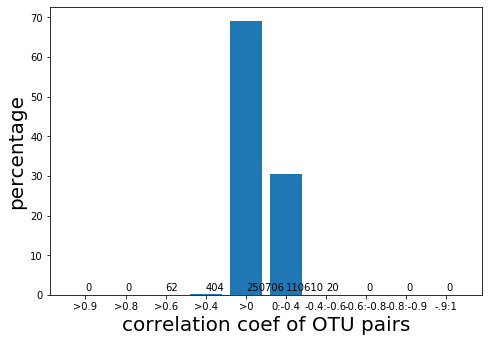

In [140]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 25), dpi=80, facecolor='w', edgecolor='k')
fig = figure()
ax = fig.add_axes([0,0,1,1])
percs = ['>0.9', '>0.8', '>0.6', '>0.4', '>0','0:-0.4', '-0.4:-0.6', '-0.6:-0.8', '-0.8:-0.9', '-.9:1']
plt.xlabel('correlation coef of OTU pairs', fontsize=20)
plt.ylabel('percentage',fontsize=20)

# plt.text( 0. , str(len(div[0])))
plt.text( 0,1 , str(len(div[0])) ,fontsize=10)
plt.text( 1,1 , str(len(div[1])),fontsize=10)
plt.text( 2,1 , str(len(div[2])) ,fontsize=10)
plt.text( 3,1 , str(len(div[3])),fontsize=10)
plt.text( 4,1 , str(len(div[4])),fontsize=10)
plt.text( 5,1 , str(len(div[5])),fontsize=10)
plt.text( 6,1 , str(len(div[6])),fontsize=10)
plt.text( 7,1 , str(len(div[7])),fontsize=10)
plt.text( 8,1 , str(len(div[8])),fontsize=10)
plt.text( 9,1 , str(len(div[9])),fontsize=10)

ax.bar(percs,list(map(lambda a : 100*a /len(sorted_corrolations),list(map(len,div)))))
plt.show()
           

# plt.xlabel('correlation coef of OTU pairs', fontsize=20)
# plt.ylabel('percentage', fontsize=20)
# ax.bar(percs,list(map(lambda a : 100*a /len(sorted_corrolations),list(map(len,div)))))
# plt.show()/

In [141]:
len(div)

10

In [104]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 25), dpi=80, facecolor='w', edgecolor='k')
fig = figure()
ax = fig.add_axes([0,0,1,1])
percs = ['>0.9', '>0.8', '>0.6', '>0.4', '>0','0:-0.4', '-0.4:-0.6', '-0.6:-0.8', '-0.8:-0.9', '-.9:1']
plt.xlabel('correlation coef of OTU pairs', fontsize=20)
plt.ylabel('percentage', list(range(100),fontsize=20)

SyntaxError: unexpected EOF while parsing (<ipython-input-104-1d9f37292e23>, line 7)